In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import datetime
import glob
from pathlib import Path
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

DOWNLOAD_DIR = 'G:\OneDrive\Documents\BOKU\Doktorat\Kurse\Scientific Computing\entsoe-data'

This will import the data, you have to run it to be able to solve the homework.

In [2]:
def read_single_csv_entso_e(file):
    return pd.read_csv(file, sep='\t', encoding='utf-16', parse_dates=["DateTime"])


def load_complete_entso_e_data(directory):
    pattern = Path(directory) / '*.csv'
    files = glob.glob(str(pattern))

    if not files:
        raise ValueError(f"No files found when searching in {pattern}, wrong directory?")
    
    print(f'Concatenating {len(files)} csv files...')

    each_csv_file = [read_single_csv_entso_e(file) for file in files]
    data = pd.concat(each_csv_file, ignore_index=True)

    data = data.sort_values(by=["AreaName", "DateTime"])
    data = data.set_index("DateTime")

    print("Loading done.")

    return data


power_demand = load_complete_entso_e_data(DOWNLOAD_DIR)

Concatenating 68 csv files...
Loading done.


# Exercise 1 - Calculate the relation of Wednesday average consumption to Sunday average consumption for selected countries

In this exercise, calculate the relation of Wednesday average consumption to Sunday average consumption for the following countries: Austria, Germany, United Kingdom, Spain, Sweden, Italy, Croatia.

(1) First create a variable that contains only power consumption data for these countries. The pandas command ```isin()``` may be very helpful here. Reduce the data to only consider the period 2015-01-01 until 2019-12-31. The lecture slides may contain relevant code here.

(2) Then, group the data by weekday and country (i.e. AreaName). Use ```groupby``` and ```mean```for that purpose. 

(3) Calculate for all countries the proportion of Wednesday (day 2) and Sunday (day 6) by dividing the two values.

(4) For which country, this relative value is highest? What could this indicate?

In [3]:
# 1 Create Variable
power_demand_var = power_demand["AreaName"].isin(["Austria", "Germany", "United Kingdom", "Spain", "Sweden", "Italy", "Croatia"])
variable = power_demand[power_demand_var]
variable = variable['2015-01-01':'2019-12-31']
variable

# 2 groupby weekday and country
variable_weekly_mean = variable.groupby([variable.index.weekday, "AreaName"]).mean()
variable_weekly_mean

# 3 Wednesday/Sunday
Wednesday = variable_weekly_mean[(variable_weekly_mean.index.get_level_values("DateTime")==2)]
Sunday = variable_weekly_mean[(variable_weekly_mean.index.get_level_values("DateTime")==6)]
ratio = Wednesday["TotalLoadValue"].values/Sunday["TotalLoadValue"].values
df = pd.DataFrame(ratio, index=Wednesday.index)

#Relative Value is highest for Italy, --> power demand is relativley low compared to weekday

# Exercise 2 - Calculate the monthly average consumption as deviation from mean consumption

For the same countries as in the above dataset, calculate the monthly mean consumption as deviation from the mean of consumption over the whole time. Plot the curves for all countries.

(1) First create a variable that contains only power consumption data for the selected countries. The pandas command ```isin()``` may be very helpful here. If you did Exercise 1, you can use the same dataset.

(2) Then, aggregate the data by country (i.e. AreaName) and month. Use ```groupby``` and ```mean``` for that purpose. Select the column ```TotalLoadValue``` from the result.

(3)  Aggregate the data by country (i..e AreaName) only, i.e. calculate the average consumption by country using ```groupby``` and ```mean```. Select the column ```TotalLoadValue``` from the result.

(4) Divide the result of (2) by (3) and observe how well broadcasting works here.

(5) Use the command ```unstack``` on the result. How does the table look now? Plot the result. If your resulting, unstacked dataframe is called ```result```, you may use ```result.plot()``` to get a nice plot.

(6) How would you explain the difference in the curve between Croatia and Sweden?


AreaName,Austria,Croatia,Germany,Italy,Spain,Sweden,United Kingdom
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,1.000693,1.000014,1.000441,1.000251,1.000296,1.001428,1.008508
std,0.086080,0.064612,0.047963,0.058768,0.046529,0.179320,0.094234
min,0.905685,0.905044,0.947354,0.910626,0.935340,0.757850,0.896155
25%,0.923611,0.951936,0.964729,0.967953,0.973480,0.854540,0.918329
50%,0.970646,0.996170,0.980926,0.997252,1.000213,0.985059,0.988928
75%,1.078118,1.063942,1.042294,1.026274,1.022674,1.143338,1.085888
max,1.128539,1.082719,1.074510,1.136398,1.066895,1.274837,1.158053


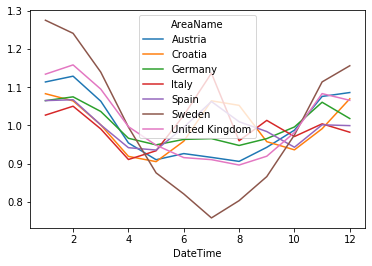

In [7]:
variable_monthly_mean = variable.groupby([variable.index.month, "AreaName"]).mean()
TotalLoad_month = variable_monthly_mean["TotalLoadValue"]
variable_country_mean = variable.groupby("AreaName").mean()
TotalLoad_country = variable_country_mean["TotalLoadValue"]
TotalLoad = TotalLoad_month/TotalLoad_country
result = TotalLoad.unstack
result().plot(kind="line")
pd.DataFrame.describe(result())

#Croatia - high peak in Summer = tourism
#Sweden - high peak in Winter = darkness

# Exercise 3 - calculate the hourly average consumption as deviation from mean consumption

Do the same as in exercise 2, but now for the hourly average consumption. I.e. how much is consumed on each of the 24 hours of a day?

Which country has the lowest, which the highest variability? What may be the reason for it?

AreaName,Austria,Croatia,Germany,Italy,Spain,Sweden,United Kingdom
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,1.000000,1.000004,1.000000,1.000000,1.000040,0.999994,1.000170
std,0.131277,0.155485,0.127966,0.163838,0.118720,0.092709,0.177526
min,0.774633,0.724223,0.784410,0.725584,0.793747,0.849989,0.706412
25%,0.898140,0.875429,0.891746,0.841233,0.892856,0.917634,0.808573
50%,1.069442,1.054478,1.066821,1.090612,1.051372,1.056453,1.098148
75%,1.104776,1.117863,1.098392,1.122416,1.093288,1.075260,1.141155
max,1.147562,1.183393,1.146919,1.170697,1.126225,1.090868,1.195277


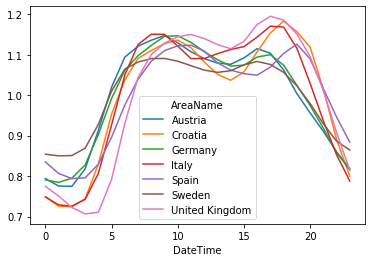

In [8]:
variable_hourly_mean = variable.groupby([variable.index.hour, "AreaName"]).mean()
TotalLoad_hour = variable_hourly_mean["TotalLoadValue"]
TotalLoad_hourly = TotalLoad_hour/TotalLoad_country
result_hourly = TotalLoad_hourly.unstack
result_hourly().plot(kind="line")
pd.DataFrame.describe(result_hourly())

#United Kingdom has highest variability 
#Sweden has the lowest variability 

# Exercise 4 - Calculate the average load per capita

Below you find a table with population data for our selected countries. You should use it to calculate per capita consumption.

(1) Calculate the average load in all countries using ```groupby``` and ```mean``` and select the column ```TotalLoadValue``` from the result.

(2) Divide the result by the ```Population``` column of the dataframe ```population```. Observe, how broadcasting helps here nicely.

(3) Plot the result. Which country has the highest load, which the lowest? What may be the reason? In which unit is this value? How could we convert it to MWh per year?

In [9]:
population = pd.DataFrame({'Country': ["Austria", "Croatia", "Germany", "Italy", "Spain", "Sweden", "United Kingdom"],
             'Population': [8840521, 4087843, 82905782, 60421760, 46796540, 10175214, 66460344]})

population.index = population["Country"]

population



,Country,Population
Country,,
Austria,Austria,8840521
Croatia,Croatia,4087843
Germany,Germany,82905782
Italy,Italy,60421760
Spain,Spain,46796540
Sweden,Sweden,10175214
United Kingdom,United Kingdom,66460344


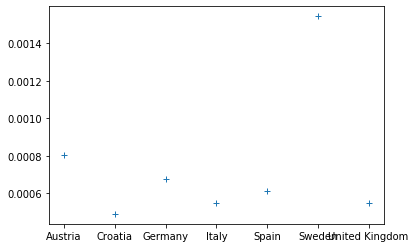

In [11]:
average_load = power_demand.groupby("AreaName").mean()
average_total_load = average_load["TotalLoadValue"]
load_population = average_total_load/population ["Population"]
load_population_selected = load_population.dropna()
load_population_selected
load_population_selected.plot(style='+')

#highest Sweden -reason: dark, cold winters
#lowest Croatia - warm climate
#Unit = MW/person